<a href="https://colab.research.google.com/github/maddogmikeb/Jira/blob/master/SprintReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Load the Ultimate Sprint Report library

from IPython.display import clear_output
import requests
import nbconvert
import nbformat

response = requests.get('https://raw.githubusercontent.com/maddogmikeb/Jira/refs/heads/master/UltimateSprintReport.ipynb' )
notebook = nbformat.reads(response.text, as_version=4)
exporter = nbconvert.PythonExporter()
source, _ = exporter.from_notebook_node(notebook)
exec(source)

clear_output()

In [13]:
from IPython.display import HTML, display
from google.colab import userdata

ultimate_sprint_report = UltimateSprintReport(
    username=userdata.get('atlassian_username'),
    password=userdata.get('atlassian_apikey'),
    jira_url=userdata.get('atlassian_host')
  )

if not ultimate_sprint_report.connected():
  raise Exception("Error while connecting to Jira")

display(HTML(ultimate_sprint_report.show_login_details()))

Currently logged in as:,Mike Burns



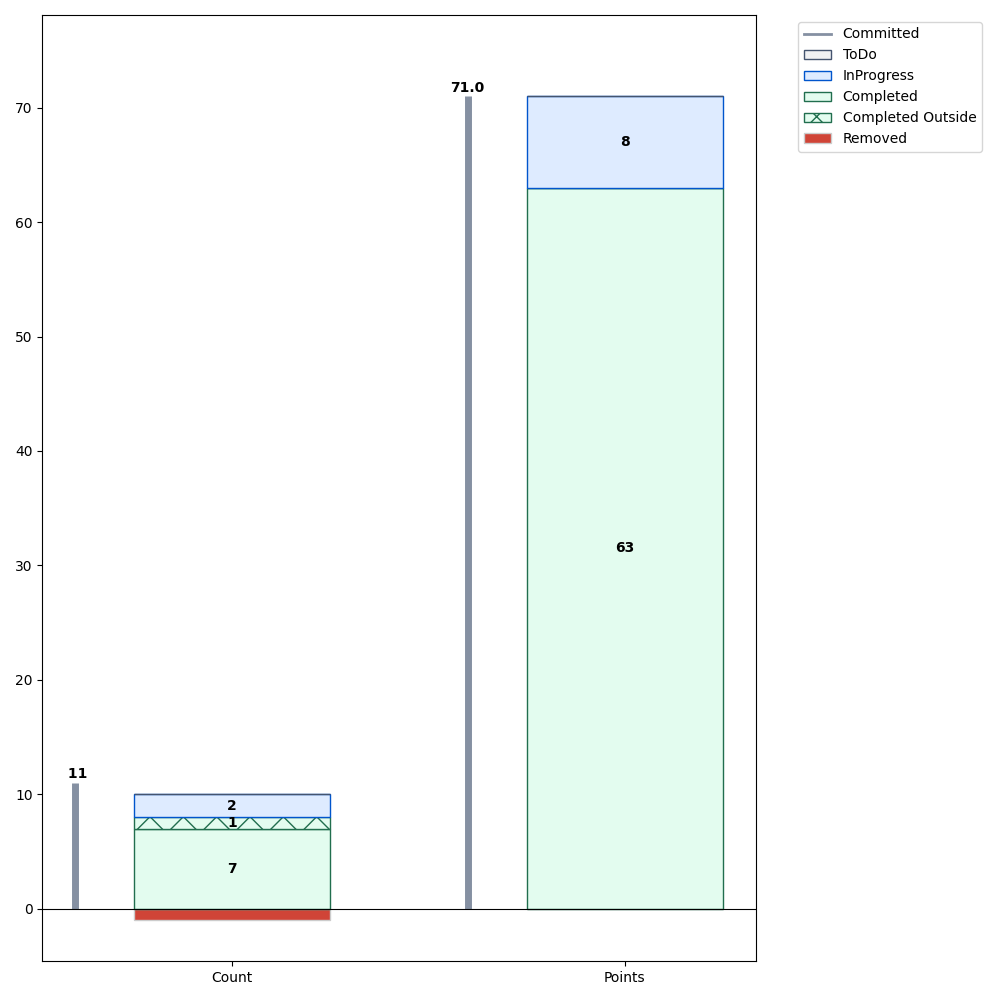

In [12]:
from IPython.display import HTML, display

display(HTML(ultimate_sprint_report
             .load("https://brisbanecitycouncil.atlassian.net/jira/software/c/projects/FDSEWMSR/boards/364/reports/sprint-retrospective?sprint=944")
             .show_report()
        ))